<a href="https://colab.research.google.com/github/pervaiz-khan-ML/XGBoost-Disease-Diagnosis/blob/main/XGBoost_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Accuracy: 0.7337662337662337

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.7

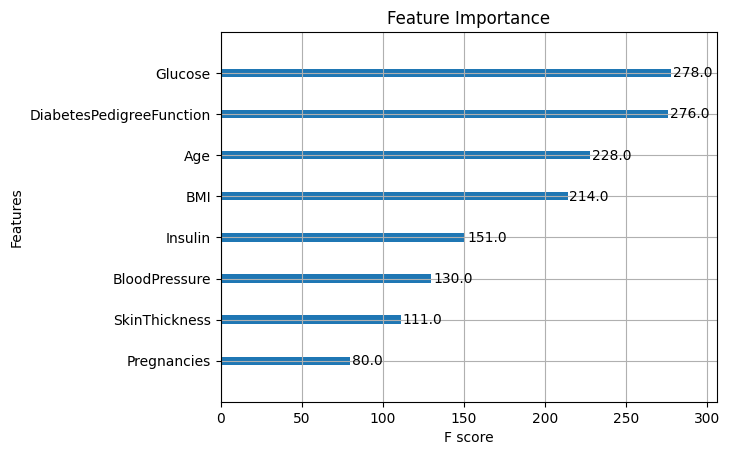

In [7]:
# disease diagnosis using xgboost -
# Pervaiz Khan

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the dataset (Pima Indians Diabetes Dataset as an example)
# You can replace this with your own medical dataset.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Load into a Pandas DataFrame
data = pd.read_csv(url, header=None, names=columns)

# Preview the data
print(data.head())

# Split the features and target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target (Outcome: 0 = No diabetes, 1 = Diabetes)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values if necessary (e.g., replace zeros with NaNs and fill with median)
X_train = X_train.replace(0, np.nan).fillna(X_train.median())
X_test = X_test.replace(0, np.nan).fillna(X_test.median())


model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Plot feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(model, importance_type="weight")
plt.title("Feature Importance")
plt.show()
